In [58]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [59]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [60]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [61]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [62]:
# Converting 2D array into 1D array
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [63]:
classes = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
# Let's plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

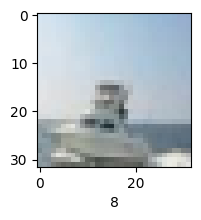

In [65]:
plot_sample(X_train, y_train, 100)

In [66]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train/255
X_test = X_test/255

In [67]:
# Build simple artificial neural network for image classification

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3017 - loss: 1.9349
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4240 - loss: 1.6407
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4551 - loss: 1.5482
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4800 - loss: 1.4815
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4926 - loss: 1.4325


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [69]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5], y_test[:5]

([3, 8, 8, 8, 4], array([3, 8, 8, 0, 6], dtype=uint8))

In [70]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4759 - loss: 1.4751


[1.478654146194458, 0.46970000863075256]

In [71]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.68      0.53      1000
           1       0.63      0.58      0.61      1000
           2       0.51      0.09      0.15      1000
           3       0.39      0.26      0.31      1000
           4       0.44      0.32      0.37      1000
           5       0.51      0.25      0.33      1000
           6       0.34      0.83      0.48      1000
           7       0.54      0.56      0.55      1000
           8       0.55      0.65      0.60      1000
           9       0.59      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [72]:
# Now let us build a convolutional neural network to train our images

cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3753 - loss: 1.7154
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5902 - loss: 1.1695
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6464 - loss: 1.0100
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6796 - loss: 0.9215
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7032 - loss: 0.8584
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7285 - loss: 0.7844
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7431 - loss: 0.7399
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7599 - loss: 0.6932
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7754 - loss: 0.6505
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7872 - loss: 0.6162


In [73]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6970 - loss: 0.9336


[0.9233019351959229, 0.7003999948501587]

In [74]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [75]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.81      0.82      0.82      1000
           2       0.68      0.52      0.59      1000
           3       0.56      0.44      0.49      1000
           4       0.64      0.67      0.65      1000
           5       0.57      0.65      0.61      1000
           6       0.79      0.74      0.77      1000
           7       0.65      0.83      0.73      1000
           8       0.77      0.84      0.80      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

